### Part A: Building KNN

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from collections import Counter

# KNN Code from https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339
def most_common(lst):
    return max(set(lst), key=lst.count)
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy


In [25]:
def load_data(filename):
    data = np.loadtxt(filename)
    X, y = data[:, :-1], data[:, -1]
    return X, y

def get_error(y_true, y_pred):
    return sum(y_true != y_pred) / len(y_true)

X_train, y_train = load_data('data/pa1train.txt')
X_validate, y_validate = load_data('data/pa1validate.txt')
X_test, y_test = load_data('data/pa1test.txt')


# Train KNN
# testing_ks = [3]
ks = [2, 4, 8, 100]
k_result, train_error, validate_error = [], [], []

for k in ks:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)

    train_pred = knn.predict(X_train)
    validate_pred = knn.predict(X_validate)

    k_result.append(k)
    train_error.append(get_error(y_train, train_pred))
    validate_error.append(get_error(y_validate, validate_pred))


print("K is ", k_result)
print("Training error is ", train_error)
print("Validation error is ", validate_error)


#  Find best k on validation set
best_k = ks[np.argmin(validate_error)]

best_knn = KNeighborsClassifier(best_k)
best_knn.fit(X_train, y_train)

test_pred = best_knn.predict(X_test)
test_error = get_error(y_test, test_pred)
print(f'Best k: {best_k}, Test Error: {test_error}')


K is  [2, 4, 8, 100]
Training error is  [0.0375, 0.054, 0.0665, 0.1985]
Validation error is  [0.093, 0.097, 0.104, 0.203]
Best k: 2, Test Error: 0.112


### Part (b): PLotting Time vs Validation Classification

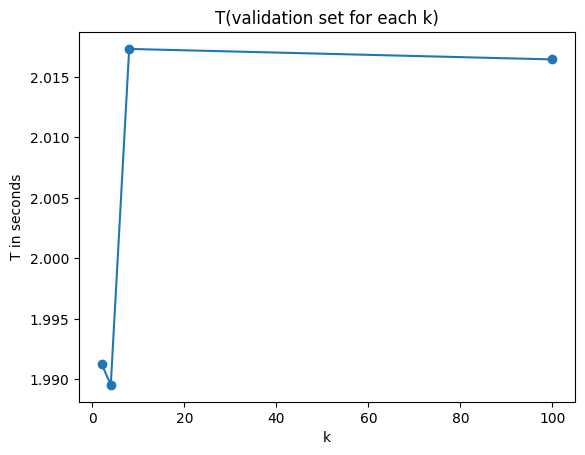

In [22]:
import time
import matplotlib.pyplot as plt

deltas = []

for k in ks:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)

    start_time = time.time()
    knn.predict(X_validate)
    end_time = time.time()

    deltas.append(end_time - start_time)

# Plotting
plt.plot(ks, times, marker='o')
plt.xlabel('k')
plt.ylabel('T in seconds')
plt.title('T(validation set for each k)')
plt.show()


### Part (c): Paremetric or Not: 
> Not Parametric

### Part (d): Knn after Projection

In [28]:
# Projection matrix
projections = np.loadtxt('data/projection.txt')

# Project data
X_train_projected = np.dot(X_train, projections)
X_validate_projected = np.dot(X_validate, projections)
X_test_projected = np.dot(X_test, projections)

projected_ks = [3, 5, 9, 11]
k_result_projected, train_error_projected, validate_error_projected = [], [], []

for k in projected_ks:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_projected, y_train)

    train_pred = knn.predict(X_train_projected)
    validate_pred = knn.predict(X_validate_projected)

    k_result_projected.append(k)
    train_error_projected.append(get_error(y_train, train_pred))
    validate_error_projected.append(get_error(y_validate, validate_pred))


print("K is ", k_result_projected)
print("Training error is ", train_error_projected)
print("Validation error is ", validate_error_projected)

#  Find best k on validation set
best_k_projected = ks[np.argmin(validate_error_projected)]

best_knn_projected = KNeighborsClassifier(best_k_projected)
best_knn.fit(X_train_projected, y_train)

test_pred_projected = best_knn.predict(X_test_projected)
test_error_projected = get_error(y_test, test_pred_projected)
print(f'Best k (Projected): {best_k_projected}, Test Error (Projected): {test_error_projected}')

K is  [3, 5, 9, 11]
Training error is  [0.1505, 0.1905, 0.2285, 0.239]
Validation error is  [0.309, 0.296, 0.29, 0.308]
Best k (Projected): 8, Test Error (Projected): 0.317
